In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import decomposition
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
import numpy as np

def pca(X, num_components):
    # 1. Standardize the data
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_normalized = (X - X_mean) / X_std
    
    # 2. Compute the covariance matrix
    covariance_matrix = np.cov(X_normalized, rowvar=False)
    
    # 3. Compute the eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # 4. Sort eigenvectors by decreasing eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]
    eigenvalues_sorted = eigenvalues[sorted_indices]
    
    # 5. Choose the top 'num_components' eigenvectors
    eigenvectors_subset = eigenvectors_sorted[:, :num_components]
    
    # 6. Transform the data
    X_reduced = np.dot(X_normalized, eigenvectors_subset)
    
    return X_reduced


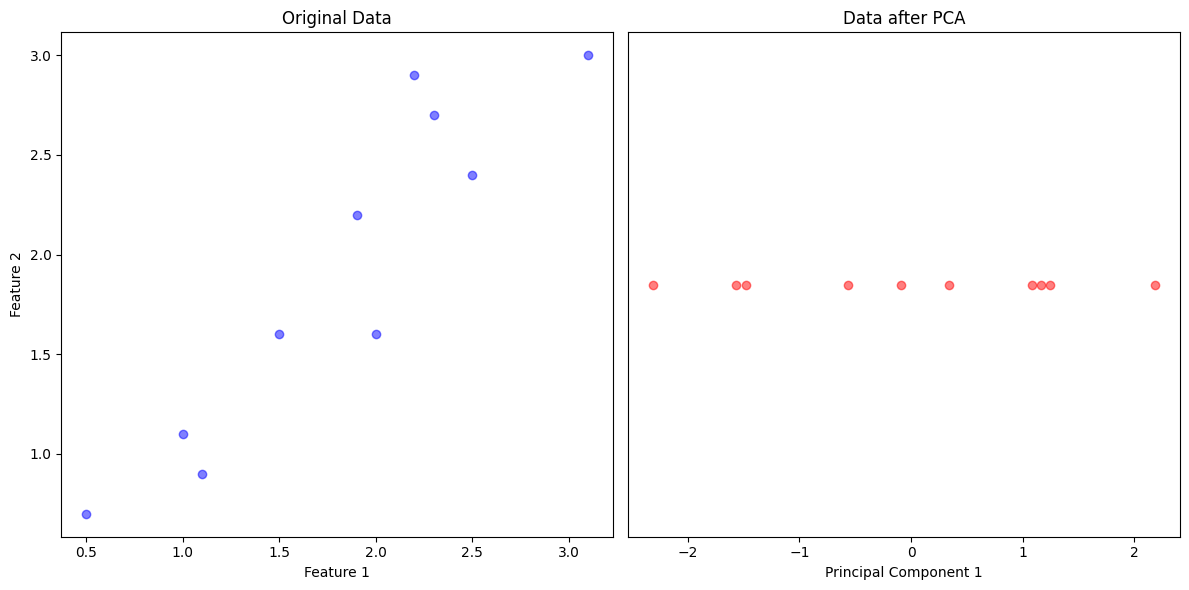

In [3]:
# Sample dataset
data = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2, 1.6],
    [1, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])

# Visualize original data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.5)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Apply PCA and reduce data to 1 dimension
data_reduced = pca(data, 1)

# Visualize reduced data
plt.subplot(1, 2, 2)
plt.scatter(data_reduced, [0] * len(data_reduced), color='red', alpha=0.5)
plt.title('Data after PCA')
plt.xlabel('Principal Component 1')
plt.yticks([])  # Hide y-axis as it's not meaningful in this 1D visualization

plt.tight_layout()
plt.show()
